In [11]:
#Primero lo que vamos a hacer es importar las librerias que vamos a utilizar
import pandas as pd #libreria para manejo de datos
import numpy as np #libreria para manejo de datos
import matplotlib.pyplot as plt #libreria para graficar
import seaborn as sns #libreria para graficar
from matplotlib import cm #libreria para graficar donde _cm es un submodulo que contiene colores
from mpl_toolkits.mplot3d import Axes3D #libreria para graficar en 3D

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p,
& \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.}
\end{cases}
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

In [5]:
#Primero vamos a definir una función que represente la verosimilitud de una distrbución de bernoulli

def bernoulli(y, yp):
    return y**yp * (1-y)**(1-yp)


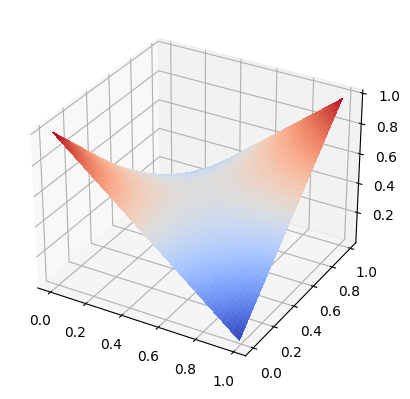

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the values of Y and YP
Y = np.arange(0,1,0.01)
YP = np.arange(0,1,0.01)
Y, YP = np.meshgrid(Y, YP)

# Calculate the Bernoulli distribution
def bernoulli(y, yp):
    return y*yp + (1-y)*(1-yp)

Z = bernoulli(Y, YP)

# Create the figure
fig = plt.figure()

# Create a new 3D axes object
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Show the plot
plt.show()



### Ahora lo que vamos a hacer es intentar obtener la función de cross-entropy para una distribución de bernoulli

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos:

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy.

Buscamos el mínimo de esta función para obtener los parámetros que mejor se ajustan a los datos, ya que significa que la probabilidad de que los datos sean etiquetados correctamente es máxima.

Una vez sabemos que tenemos que usar esta fórmula, lo que vamos a hacer es despejar la y para obtener la función de regresión logística.

Recordando que:

## Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1-\exp{(-\text{log-odds})}}
$$

donde $\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo. Estos betas son los que tenemos que ajustar para encontrar un mejor ajuste del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris:
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [17]:
#Primero importamos las librerías de sklearn

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression #Esta función tiene ya todas las fórmulas que hemos visto anteriormente implementadas

In [19]:
#Introducimos el nombre de los atributos que vamos a utilizar
atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
x, y = load_iris(return_X_y=True) #Cargamos los datos de la base de datos de iris donde x es la matriz de datos y y es el vector de etiquetas

In [20]:
clasificador = LogisticRegression(random_state=10, solver='liblinear').fit(x, y)

In [23]:
clasificador.coef_ #Esto nos da los coeficientes de la función logística, es decirm, los pesos que tiene cada atributo en la capacidad de predecir la clase

array([[ 0.41021713,  1.46416217, -2.26003266, -1.02103509],
       [ 0.4275087 , -1.61211605,  0.5758173 , -1.40617325],
       [-1.70751526, -1.53427768,  2.47096755,  2.55537041]])

In [24]:
#Podríamos predecir la clase de un nuevo dato con la siguiente función
clasificador.predict([[5.1, 3.5, 1.4, 0.2]])


array([0])